# Data Collection

In [1]:
import os
import pandas as pd

# ------------------------------------------------------------------
# 1️⃣ Load CSV files
# ------------------------------------------------------------------
main_folder = r'D:\Rap_Gemastik2\street-food-image-classification'

train_df = pd.read_csv(os.path.join(main_folder, 'train.csv'))
test_df  = pd.read_csv(os.path.join(main_folder, 'test.csv'))

print("Train columns:", train_df.columns.tolist())
print("Test columns :", test_df.columns.tolist())

# ------------------------------------------------------------------
# 2️⃣ Gunakan kolom image_id secara langsung
# ------------------------------------------------------------------
# Misalnya kita hanya ingin menampilkan 5 baris pertama
print("\nSample training set:")
print(train_df[['image_id', 'label']].head())

print("\nSample test set:")
print(test_df['image_id'].head())


Train columns: ['image_id', 'label']
Test columns : ['image_id']

Sample training set:
                 image_id   label
0  burger/0003_burger.jpg  burger
1  burger/0004_burger.jpg  burger
2  burger/0005_burger.jpg  burger
3  burger/0007_burger.jpg  burger
4  burger/0008_burger.jpg  burger

Sample test set:
0    caa537b8.jpg
1    0d335021.jpg
2    135fbbcb.jpg
3    45bf117b.jpg
4    a42f665f.jpg
Name: image_id, dtype: object


# Exploratory Data Analysis

Train shape : (1520, 3)
Test  shape : (764, 2)

=== ID Ranges ===
Train: min=burger/0003_burger.jpg, max=tacos/0198_tacos.jpg
Test : min=00de5019.jpg,  max=ff3fd2cd.jpg

=== Class distribution (train) ===
burger               : 156
churros              : 160
crepes               : 160
falafel              : 141
hot_dog              : 160
pad_thai             : 128
pani_puri            : 155
pretzel              : 143
shawarma             : 159
tacos                : 158


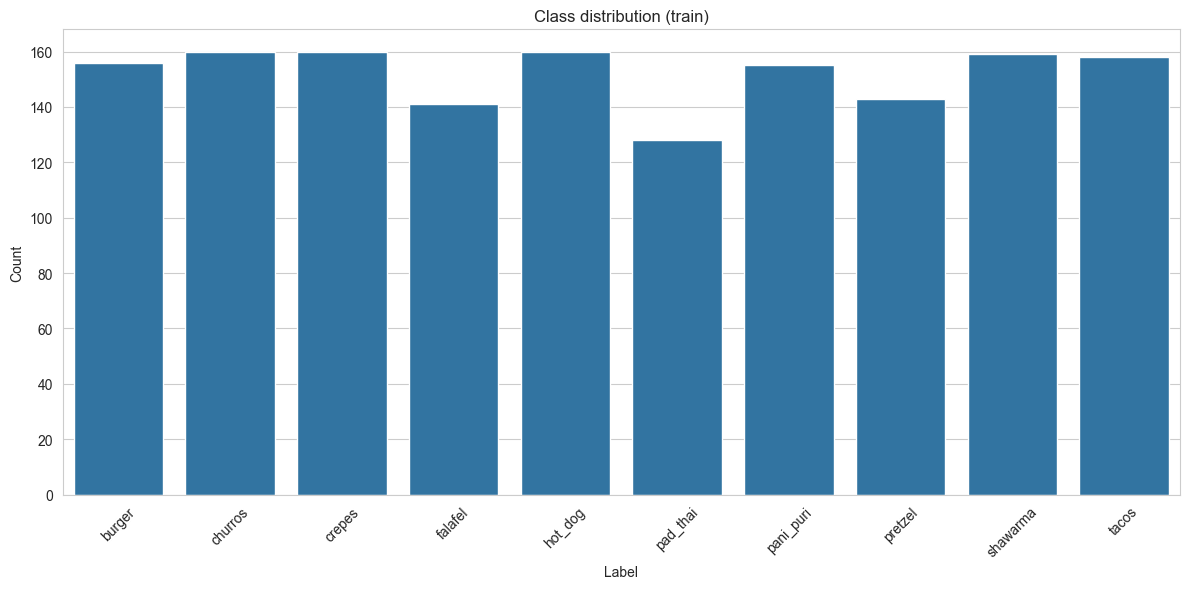


=== Missing values ===
image_id    0
label       0
folder      0
dtype: int64
image_id    0
folder      0
dtype: int64

=== Sample training images ===


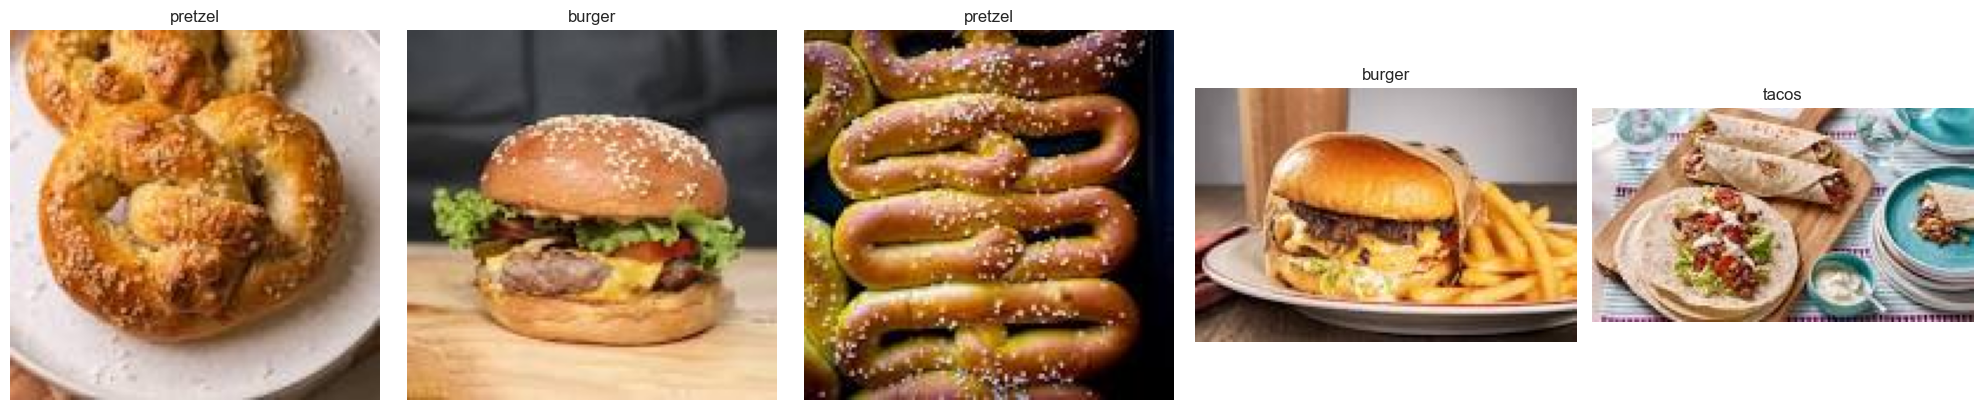


=== Sample test images ===


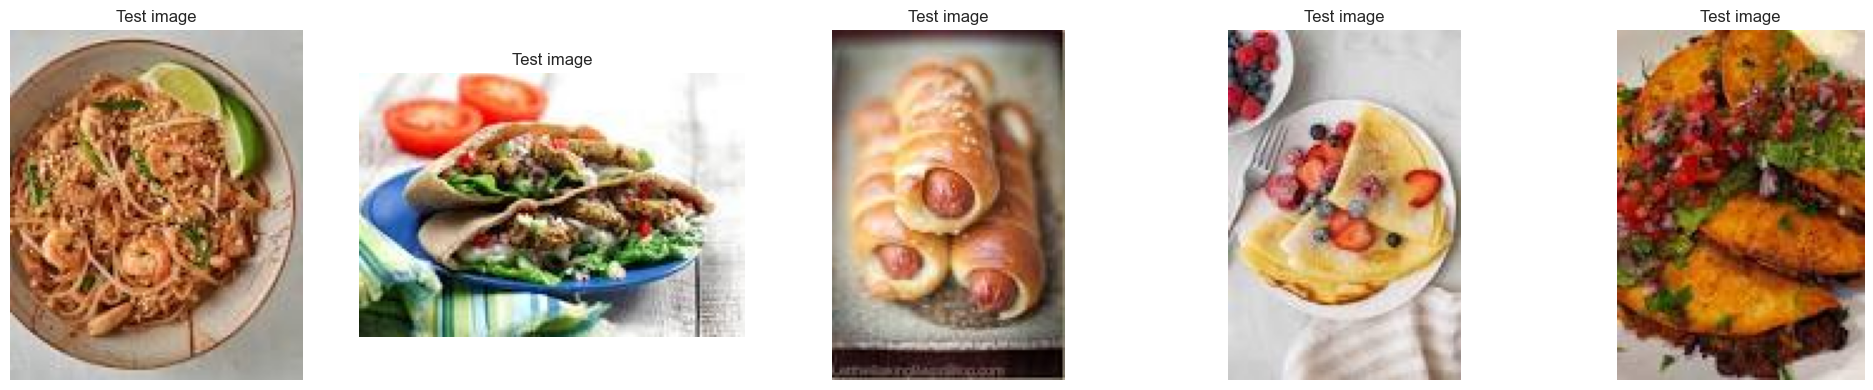

In [2]:
# -------------------------------------------------------
# 1️⃣  Imports & constants
# -------------------------------------------------------
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image

# Path to the BASE_DIR folder that contains train.csv, test.csv and the images
MAIN_FOLDER = r'D:\Rap_Gemastik2\street-food-image-classification'

# -------------------------------------------------------
# 2️⃣  Load data
# -------------------------------------------------------
train_df = pd.read_csv(os.path.join(MAIN_FOLDER, 'train.csv'))
test_df  = pd.read_csv(os.path.join(MAIN_FOLDER, 'test.csv'))

# 2. Tambahkan kolom folder
train_df['folder'] = 'train_images'
test_df['folder']  = 'test_images'
print(f"Train shape : {train_df.shape}")
print(f"Test  shape : {test_df.shape}\n")

# -------------------------------------------------------
# 3️⃣  Basic statistics
# -------------------------------------------------------
print("=== ID Ranges ===")
print(f"Train: min={train_df['image_id'].min()}, max={train_df['image_id'].max()}")
print(f"Test : min={test_df['image_id'].min()},  max={test_df['image_id'].max()}")

print("\n=== Class distribution (train) ===")
class_counts = Counter(train_df['label'])
for lbl, cnt in class_counts.items():
    print(f"{lbl:20s} : {cnt}")

# Plot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=train_df, order=sorted(class_counts.keys()))
plt.title("Class distribution (train)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 4️⃣  Missing‑value check
# -------------------------------------------------------
print("\n=== Missing values ===")
print(train_df.isnull().sum())
print(test_df.isnull().sum())

# -------------------------------------------------------
# 5️⃣  Utility to show sample images
# -------------------------------------------------------
def display_sample_images(df: pd.DataFrame, num_samples=5, is_train=True):
    sample_indices = random.sample(range(len(df)), num_samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(4 * num_samples, 4))
    if num_samples == 1:
        axes = [axes]
    for ax, idx in zip(axes, sample_indices):
        row   = df.iloc[idx]
        img_path = os.path.join(MAIN_FOLDER, row['folder'], row['image_id'])
        if not os.path.exists(img_path):
            ax.text(0.5, 0.5, 'Image\nNot Found', ha='center',
                    va='center', fontsize=12, color='red')
            print(f"[WARN] Image not found: {img_path}")
            ax.axis('off')
            continue
        img = Image.open(img_path).convert("RGB")
        ax.imshow(img)
        ax.axis('off')
        title = row['label'] if is_train else "Test image"
        ax.set_title(title, fontsize=12)
    plt.tight_layout()
    plt.show()

# 3. Tampilkan contoh
print("\n=== Sample training images ===")
display_sample_images(train_df, num_samples=5, is_train=True)

print("\n=== Sample test images ===")
display_sample_images(test_df, num_samples=5, is_train=False)

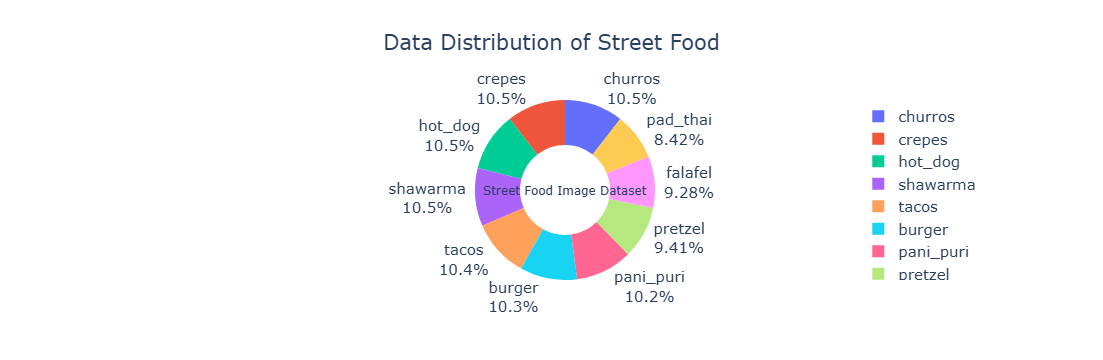

In [3]:
import plotly.express as px
from pathlib import Path

BASE_DIR = Path(r'D:\Rap_Gemastik2\street-food-image-classification')

# 1️⃣ Hitung jumlah tiap label dan buat DataFrame
label_counts = train_df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']          # kolom: nama label & frekuensi

# 2️⃣ Buat pie‑chart (donut)
fig = px.pie(
    label_counts,                 # data yang dipakai
    names='label',                # apa yang menjadi “nama” tiap irisan
    values='count',               # nilai numerik yang membentuk ukuran irisan
    hole=0.5,                     # membuat donut (nilai 1 = penuh)
    title='Data Distribution of Street Food'
)

# 3️⃣ Tampilkan persentase di dalam setiap irisan
fig.update_traces(
    textinfo='percent+label',     # 'label' + 'percent'   → label dan persen
    textfont_size=15              # ukuran font teks
)

# 4️⃣ Tambahkan anotasi tengah (opsional)
fig.add_annotation(
    dict(
        text="Street Food Image Dataset",
        x=0.5, y=0.5,
        showarrow=False,
        font=dict(size=12)
    )
)

# 5️⃣ Sesuaikan layout jika diinginkan
fig.update_layout(
    title_x=0.5,                  # rata‑kan judul
    font=dict(size=15)           # ukuran font default
)

fig.show()

Directories dictionary: {'burger': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/burger'), 'churros': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/churros'), 'crepes': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/crepes'), 'falafel': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/falafel'), 'hot_dog': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/hot_dog'), 'pad_thai': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/pad_thai'), 'pani_puri': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/pani_puri'), 'pretzel': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/pretzel'), 'shawarma': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/shawarma'), 'tacos': WindowsPath('D:/Rap_Gemastik2/street-food-image-classification/train_images/taco

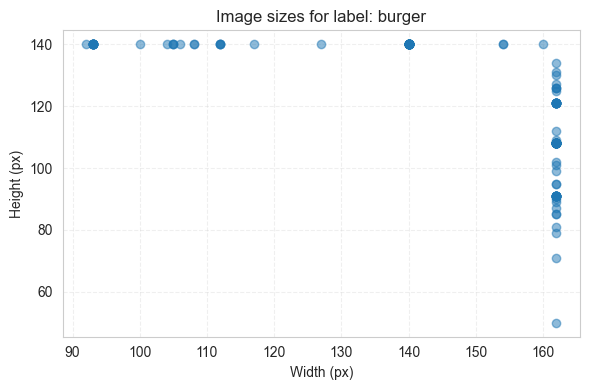

[########################################] | 100% Completed | 304.00 ms

churros – 160 images
   height  width
0     133    162
1      91    162
2     140     93
3     121    162
4     140    140


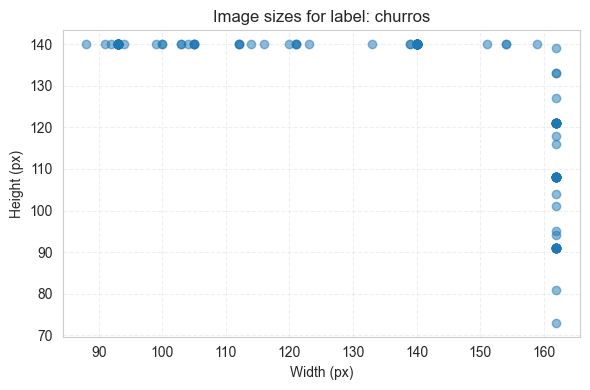

[########################################] | 100% Completed | 304.07 ms

crepes – 160 images
   height  width
0     140     93
1     140    140
2     140    140
3     140     93
4     140    105


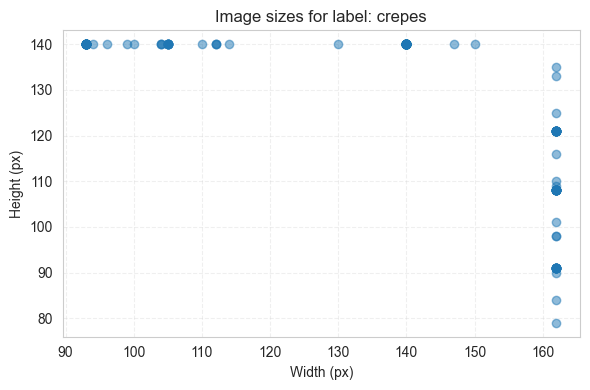

[########################################] | 100% Completed | 304.88 ms

falafel – 141 images
   height  width
0     121    162
1     140    140
2     140    103
3     140     93
4     140    140


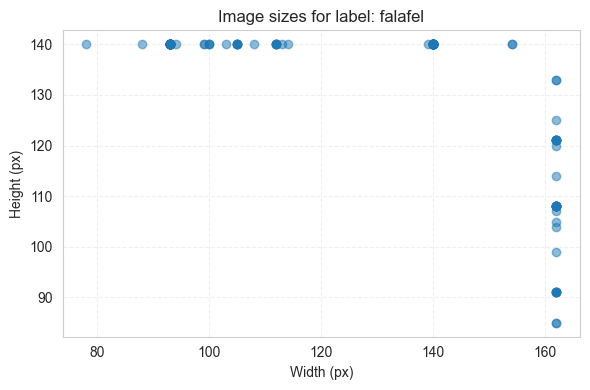

[########################################] | 100% Completed | 303.62 ms

hot_dog – 160 images
   height  width
0     140    140
1     140     93
2     140     93
3      91    162
4     140    140


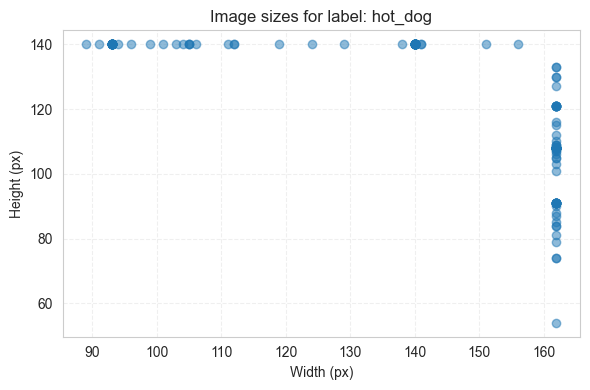

[########################################] | 100% Completed | 304.67 ms

pad_thai – 128 images
   height  width
0     140    140
1     140     93
2      79    162
3     140    140
4     108    162


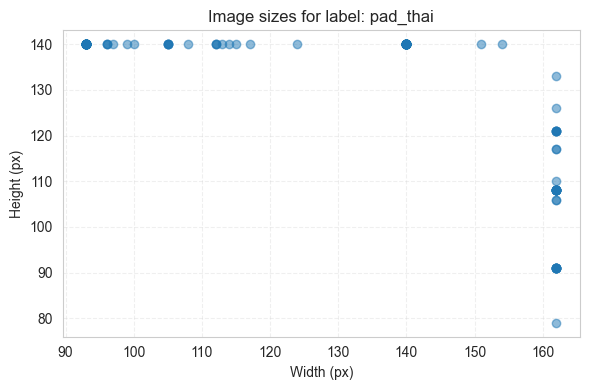

[########################################] | 100% Completed | 312.06 ms

pani_puri – 155 images
   height  width
0     140    140
1     140     93
2     140    136
3     140     93
4     108    162


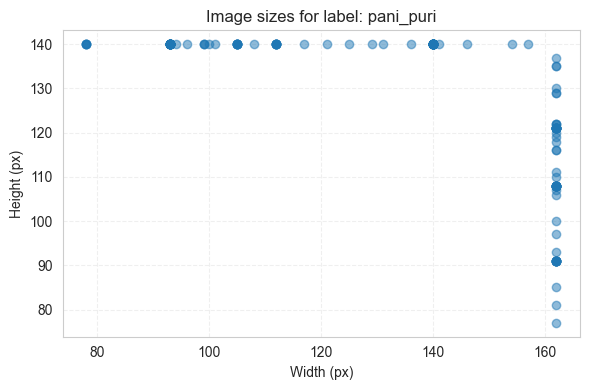

[########################################] | 100% Completed | 316.15 ms

pretzel – 143 images
   height  width
0     140    140
1     140     93
2     140    140
3     140    140
4     140     93


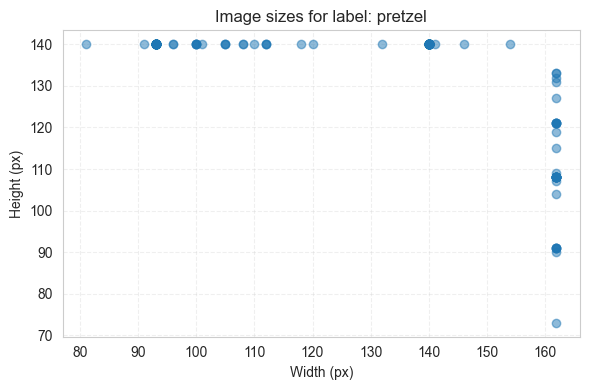

[########################################] | 100% Completed | 313.80 ms

shawarma – 159 images
   height  width
0     121    162
1     140     95
2     113    162
3     140    140
4     121    162


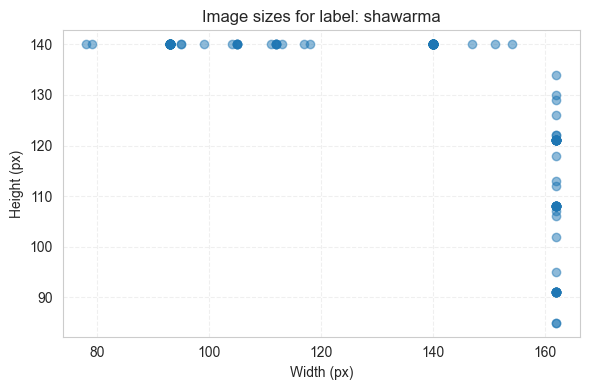

[########################################] | 100% Completed | 311.39 ms

tacos – 158 images
   height  width
0     103    162
1     140    107
2     121    162
3      95    162
4     140    112


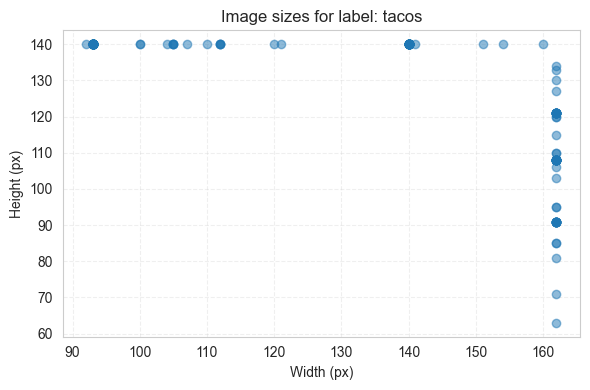

In [4]:
directories = {}
for lbl in train_df['label'].unique():
    # Adjust the folder name if it differs from the label string
    directories[lbl] = BASE_DIR / 'train_images' / lbl

print("Directories dictionary:", directories)

# -------------------------------------------------------------
# 5️⃣  (Optional) Use Dask Bag to compute image dimensions
# -------------------------------------------------------------
# Only run this part if you really need parallelism and have many images.
# If the dataset is small, a simple pandas apply will suffice.

try:
    import dask.bag as db
    from dask.diagnostics import ProgressBar
except ImportError:
    print("Dask not installed – skipping Dask part.")
else:
    def get_dims(path):
        from PIL import Image
        with Image.open(str(path)) as img:
            return {'height': img.height, 'width': img.width}

    for label, folder in directories.items():
        # Gather all files in the folder (adjust glob pattern if needed)
        file_list = [p for p in Path(folder).iterdir() if p.is_file()]

        bag = db.from_sequence(file_list, npartitions=8).map(get_dims)

        with ProgressBar():
            results = bag.compute()

        df = pd.DataFrame(results)  # columns: height, width
        print(f"\n{label} – {len(df)} images")
        print(df.head())

        # Plot scatter of dimensions
        plt.figure(figsize=(6,4))
        plt.scatter(df['width'], df['height'], alpha=0.5)
        plt.title(f"Image sizes for label: {label}")
        plt.xlabel("Width (px)")
        plt.ylabel("Height (px)")
        plt.grid(True, ls='--', alpha=0.3)
        plt.tight_layout()
        plt.show()

# -------------------------------------------------------------
# 6️⃣  If you don't have separate folders – just plot from the dataframe
# -------------------------------------------------------------
if not directories:
    # Build a simple scatter using all images in train_df
    import cv2

    heights, widths = [], []

    for path in train_df['filepath']:
        if os.path.exists(path):
            img = cv2.imread(str(path))
            h, w = img.shape[:2]
            heights.append(h)
            widths.append(w)

    plt.figure(figsize=(6,4))
    plt.scatter(widths, heights, alpha=0.5)
    plt.title("Image sizes – entire training set")
    plt.xlabel("Width (px)")
    plt.ylabel("Height (px)")
    plt.grid(True, ls='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Data Preprocessing

In [5]:
# =========================================================
# ✅ Fine-Tuning ViT on Street Food Dataset (End-to-End)
# =========================================================
import os
import torch
import random
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from sklearn.metrics import accuracy_score
from transformers import AutoImageProcessor, ViTForImageClassification

In [6]:
# =========================================================
# ✅ Environment Setup
# =========================================================
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

BASE_DIR = Path(r"D:\Rap_Gemastik2\street-food-image-classification")
MODEL_DIR = "google/vit-base-patch16-224-in21k"  # bisa lokal juga kalau sudah download

# =========================================================
# ✅ Load Dataset
# =========================================================
train_df = pd.read_csv(BASE_DIR / "train.csv")
test_df  = pd.read_csv(BASE_DIR / "test.csv")

# Label encoding
label2id = {label: idx for idx, label in enumerate(sorted(train_df["label"].unique()))}
id2label = {v: k for k, v in label2id.items()}
train_df["label_id"] = train_df["label"].map(label2id)

num_classes = len(label2id)
print(f"📊 Jumlah kelas: {num_classes}")

# =========================================================
# ✅ Processor & Augmentation
# =========================================================
processor = AutoImageProcessor.from_pretrained(MODEL_DIR)

train_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
])

val_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
])

# =========================================================
# ✅ Custom Dataset (Train/Test)
# =========================================================
class FoodDataset(Dataset):
    def __init__(self, df, img_dir, processor, transform=None, is_test=False):
        self.df = df
        self.img_dir = img_dir
        self.processor = processor
        self.transform = transform
        self.is_test = is_test

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["image_id"])
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        inputs = self.processor(images=image, return_tensors="pt")
        item = {k: v.squeeze() for k, v in inputs.items()}

        if not self.is_test:
            item["labels"] = torch.tensor(int(row["label_id"]))
        else:
            item["labels"] = torch.tensor(-1)
        return item

# =========================================================
# ✅ MixUp Function
# =========================================================
def mixup_data(x, y, alpha=0.4):
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# =========================================================
# ✅ DataLoader
# =========================================================
train_dataset = FoodDataset(train_df, BASE_DIR / "train_images", processor, transform=train_tfms)
val_dataset   = FoodDataset(test_df,  BASE_DIR / "test_images",  processor, transform=val_tfms, is_test=True)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=0)

print(f"✅ Train batches: {len(train_loader)} | Val batches: {len(val_loader)}")

Using device: cuda
📊 Jumlah kelas: 10


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


✅ Train batches: 190 | Val batches: 96


# Fine-Tuning

In [ ]:
# =========================================================
# ✅ Fine-Tuning ViT with Proper Train/Val Split
# =========================================================
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from transformers import ViTForImageClassification, ViTConfig, AutoImageProcessor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from pathlib import Path
from PIL import Image
import pandas as pd
import os

# =========================================================
# ✅ Device setup
# =========================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# =========================================================
# ✅ Paths
# =========================================================
BASE_DIR = Path(r"D:\Rap_Gemastik2\street-food-image-classification")
MODEL_DIR = Path(r"D:\ModelGemastik\vit-base-patch16-224-in21k")

# =========================================================
# ✅ Load data
# =========================================================
train_df = pd.read_csv(BASE_DIR / "train.csv")
test_df  = pd.read_csv(BASE_DIR / "test.csv")

# Buat label encoding
label2id = {label: idx for idx, label in enumerate(sorted(train_df["label"].unique()))}
id2label = {v: k for k, v in label2id.items()}
train_df["label_id"] = train_df["label"].map(label2id)

# Split train jadi train/val
train_split, val_split = train_test_split(train_df, test_size=0.2, stratify=train_df["label_id"], random_state=42)

print(f"Train samples: {len(train_split)} | Val samples: {len(val_split)} | Test samples: {len(test_df)}")

# =========================================================
# ✅ Dataset
# =========================================================
class FoodDataset(Dataset):
    def __init__(self, df, img_dir, processor, transform=None, has_label=True):
        self.df = df
        self.img_dir = img_dir
        self.processor = processor
        self.transform = transform
        self.has_label = has_label

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["image_id"])
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        inputs = self.processor(images=image, return_tensors="pt")
        item = {k: v.squeeze() for k, v in inputs.items()}

        if self.has_label:
            item["labels"] = torch.tensor(int(row["label_id"]))
        else:
            item["labels"] = torch.tensor(-1)  # dummy label
        return item

# =========================================================
# ✅ Transforms
# =========================================================
train_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
])
val_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
])

# =========================================================
# ✅ Processor & Dataloaders
# =========================================================
processor = AutoImageProcessor.from_pretrained(MODEL_DIR, use_fast=True)

train_dataset = FoodDataset(train_split, BASE_DIR / "train_images", processor, transform=train_tfms)
val_dataset   = FoodDataset(val_split,   BASE_DIR / "train_images", processor, transform=val_tfms)
test_dataset  = FoodDataset(test_df,     BASE_DIR / "test_images",  processor, transform=val_tfms, has_label=False)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=8, shuffle=False)

print(f"✅ Dataloaders ready: train={len(train_loader)} | val={len(val_loader)} | test={len(test_loader)}")

# =========================================================
# ✅ Config & Model
# =========================================================
config = ViTConfig.from_pretrained(
    MODEL_DIR,
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id,
    hidden_dropout_prob=0.4,
    attention_probs_dropout_prob=0.4,
)
model = ViTForImageClassification.from_pretrained(
    MODEL_DIR,
    config=config,
    ignore_mismatched_sizes=True
).to(device)

# Freeze bagian awal
for name, param in model.vit.embeddings.named_parameters():
    param.requires_grad = False
for name, param in model.vit.encoder.layer[:6].named_parameters():
    param.requires_grad = False

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)

# =========================================================
# ✅ Loss (Label Smoothing)
# =========================================================
class LabelSmoothingLoss(torch.nn.Module):
    def __init__(self, smoothing=0.2):
        super().__init__()
        self.smoothing = smoothing
    def forward(self, pred, target):
        log_probs = F.log_softmax(pred, dim=-1)
        nll = -log_probs.gather(dim=-1, index=target.unsqueeze(1)).squeeze(1)
        smooth = -log_probs.mean(dim=-1)
        return ((1 - self.smoothing) * nll + self.smoothing * smooth).mean()

criterion = LabelSmoothingLoss(0.2)

# =========================================================
# ✅ Train & Validation
# =========================================================
def train_epoch(model, loader):
    model.train()
    total_loss = 0
    for batch in tqdm(loader, desc="Training"):
        x = batch["pixel_values"].to(device)
        y = batch["labels"].to(device)
        optimizer.zero_grad()
        outputs = model(pixel_values=x)
        loss = criterion(outputs.logits, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def eval_epoch(model, loader):
    model.eval()
    total_loss, preds, labels = 0, [], []
    with torch.no_grad():
        for batch in tqdm(loader, desc="Validating"):
            x = batch["pixel_values"].to(device)
            y = batch["labels"].to(device)
            outputs = model(pixel_values=x)
            loss = criterion(outputs.logits, y)
            total_loss += loss.item()
            preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
            labels.extend(y.cpu().numpy())
    acc = accuracy_score(labels, preds)
    return total_loss / len(loader), acc

# =========================================================
# ✅ Training Loop with History
# =========================================================
num_epochs = 10
best_acc = 0
history = []

for epoch in range(num_epochs):
    print(f"\n📚 Epoch {epoch+1}/{num_epochs}")
    train_loss = train_epoch(model, train_loader)
    val_loss, val_acc = eval_epoch(model, val_loader)

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    history.append({"epoch": epoch+1, "train_loss": train_loss, "val_loss": val_loss, "val_acc": val_acc})

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_model.pt")
        print("✅ Model improved and saved.")

    if epoch == 2:
        print("🔓 Unfreezing last 4 layers...")
        for param in model.vit.encoder.layer[-4:].parameters():
            param.requires_grad = True
        optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)

print("🎯 Training complete.")

pd.DataFrame(history).to_csv("training_history.csv", index=False)


Using device: cuda
Train samples: 1216 | Val samples: 304 | Test samples: 764
✅ Dataloaders ready: train=152 | val=38 | test=96


Some weights of ViTForImageClassification were not initialized from the model checkpoint at D:\ModelGemastik\vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📚 Epoch 1/10


Validating:  74%|████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 28/38 [00:03<00:01,  7.53it/s]

In [9]:
import pandas as pd
from pathlib import Path

BASE_DIR = Path(r"D:\Rap_Gemastik2\street-food-image-classification")

train_df = pd.read_csv(BASE_DIR / "train.csv")
test_df = pd.read_csv(BASE_DIR / "test.csv")

print("===== TRAIN =====")
print(train_df.head(), "\n")
print("Columns:", train_df.columns.tolist())
print("Shape:", train_df.shape)

print("\n===== TEST =====")
print(test_df.head(), "\n")
print("Columns:", test_df.columns.tolist())
print("Shape:", test_df.shape)


===== TRAIN =====
                 image_id   label
0  burger/0003_burger.jpg  burger
1  burger/0004_burger.jpg  burger
2  burger/0005_burger.jpg  burger
3  burger/0007_burger.jpg  burger
4  burger/0008_burger.jpg  burger 

Columns: ['image_id', 'label']
Shape: (1520, 2)

===== TEST =====
       image_id
0  caa537b8.jpg
1  0d335021.jpg
2  135fbbcb.jpg
3  45bf117b.jpg
4  a42f665f.jpg 

Columns: ['image_id']
Shape: (764, 1)


# Evaluation

In [8]:
# =========================================================
# ✅ FINAL EVALUATION & SUBMISSION BLOCK (NO LABEL TEST)
# =========================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from tabulate import tabulate
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

# =========================================================
# 1️⃣ LOSS HISTORY (TABULAR + GRAPH)
# =========================================================
print("\n📉 Loss History (Tabular Text):")
loss_table = []
for i in range(len(history['fold'])):
    loss_table.append([
        history['fold'][i],
        history['epoch'][i],
        f"{history['train_loss'][i]:.4f}",
        f"{history['val_loss'][i]:.4f}"
    ])
print(tabulate(loss_table, headers=["Fold", "Epoch", "Train Loss", "Val Loss"], tablefmt="grid"))

k_folds = len(set(history['fold']))
plt.figure(figsize=(10, 6))
for fold in range(1, k_folds + 1):
    fold_mask = [i for i, f in enumerate(history['fold']) if f == fold]
    plt.plot([history['epoch'][i] for i in fold_mask],
             [history['train_loss'][i] for i in fold_mask],
             label=f'Fold {fold} Train', linestyle='--')
    plt.plot([history['epoch'][i] for i in fold_mask],
             [history['val_loss'][i] for i in fold_mask],
             label=f'Fold {fold} Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss per Fold')
plt.legend()
plt.grid(True)
plt.show()

# =========================================================
# 2️⃣ ACCURACY HISTORY (TABULAR + GRAPH)
# =========================================================
print("\n📊 Metrics History (Tabular Text):")
metrics_table = []
for i in range(len(history['fold'])):
    metrics_table.append([
        history['fold'][i],
        history['epoch'][i],
        f"{history['val_accuracy'][i]:.4f}"
    ])
print(tabulate(metrics_table, headers=["Fold", "Epoch", "Accuracy"], tablefmt="grid"))

plt.figure(figsize=(10, 6))
for fold in range(1, k_folds + 1):
    fold_mask = [i for i, f in enumerate(history['fold']) if f == fold]
    plt.plot([history['epoch'][i] for i in fold_mask],
             [history['val_accuracy'][i] for i in fold_mask],
             label=f'Fold {fold}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Across Folds')
plt.legend()
plt.grid(True)
plt.show()

# =========================================================
# 3️⃣ INTERNAL VALIDATION EVALUATION (CONFUSION MATRIX + REPORT)
# =========================================================
print("\n🧩 Internal Validation Evaluation (from val_loader):")
val_preds, val_labels = [], []
model.eval()
with torch.no_grad():
    for batch in val_loader:
        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(pixel_values=pixel_values)
        preds = torch.argmax(outputs.logits, dim=1)
        val_preds.extend(preds.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

unique_label_ids = sorted(np.unique(val_labels))
used_classes = [classes[i] for i in unique_label_ids]

print("\n📋 Classification Report (Validation Set):")
print(classification_report(
    val_labels,
    val_preds,
    labels=unique_label_ids,
    target_names=used_classes,
    zero_division=0
))

val_cm = confusion_matrix(val_labels, val_preds, labels=unique_label_ids)
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=used_classes, yticklabels=used_classes)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# =========================================================
# 4️⃣ LEADERBOARD SIMULATION (60:40 SPLIT dari VALIDASI)
# =========================================================
print("\n🏆 Simulated Leaderboard (Validation 60% vs 40%)")

X_60, X_40, y_60, y_40 = train_test_split(
    val_preds, val_labels, test_size=0.4, random_state=42, stratify=val_labels
)

acc_60 = accuracy_score(y_60, X_60)
f1_60 = f1_score(y_60, X_60, average='weighted')

acc_40 = accuracy_score(y_40, X_40)
f1_40 = f1_score(y_40, X_40, average='weighted')

print("\n==================== 🏅 LEADERBOARD SIMULATION ====================")
print(f"Simulated Public Leaderboard (60% Validation):")
print(f"  Accuracy : {acc_60:.4f}")
print(f"  F1-score : {f1_60:.4f}")

print(f"\nSimulated Private Leaderboard (40% Remaining):")
print(f"  Accuracy : {acc_40:.4f}")
print(f"  F1-score : {f1_40:.4f}")
print("================================================================")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_60, X_60), annot=True, fmt='d', cmap='Greens',
            xticklabels=used_classes, yticklabels=used_classes)
plt.title('Confusion Matrix - Public Leaderboard (60%)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_40, X_40), annot=True, fmt='d', cmap='Oranges',
            xticklabels=used_classes, yticklabels=used_classes)
plt.title('Confusion Matrix - Private Leaderboard (40%)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



📉 Loss History (Tabular Text):


NameError: name 'history' is not defined

# Submission

In [ ]:
# =========================================================
# 5️⃣ SUBMISSION FILE CREATION
# =========================================================
print("\n📦 Generating Kaggle Submission File...")

model.eval()
submission_preds = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Inference on Test Set"):
        pixel_values = batch['pixel_values'].to(device)
        outputs = model(pixel_values=pixel_values)
        preds = torch.argmax(outputs.logits, dim=1)
        submission_preds.extend(preds.cpu().numpy())

# Load sample submission
sample_submission = pd.read_csv("/mnt/data/sample_submission.csv")
sample_submission["label"] = [classes[p] for p in submission_preds[:len(sample_submission)]]

# Save final submission file
output_path = "submission_vit_streetfood.csv"
sample_submission.to_csv(output_path, index=False)
print(f"\n✅ Submission file saved as: {output_path}")

# =========================================================
# 6️⃣ VISUAL CHECK
# =========================================================
print("\n🔍 Preview of Submission File:")
print(sample_submission.head())